In [29]:
import os
os.listdir()


['.ipynb_checkpoints',
 'house_price_model.pkl',
 'predict_house_price.py',
 'train.csv',
 'Untitled.ipynb',
 'venv']

In [30]:
import os
os.getcwd()


'C:\\Users\\Charumathi\\Desktop\\python projects\\house_price_project'

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [32]:
data = pd.read_csv("train.csv")
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [33]:
print("Shape of dataset:", data.shape)
print("\nMissing values per column:")
print(data.isnull().sum().sort_values(ascending=False).head(20))
data.describe()


Shape of dataset: (1460, 81)

Missing values per column:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [34]:
features = ["GrLivArea", "OverallQual", "TotalBsmtSF", "FullBath", "GarageCars"]
target = "SalePrice"
df = data[features + [target]].dropna()
X = df[features]
y = df[target]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
y_pred = model.predict(X_test)
pd.DataFrame({"Actual": y_test.values[:10], "Predicted": y_pred[:10]})


,Actual,Predicted
0,154500,143056.357252
1,325000,288157.712063
2,115000,135652.287583
3,159000,187642.481526
4,315500,293548.624816
5,75500,45878.703172
6,311500,215698.580784
7,146000,174656.986516
8,84500,45878.703172
9,135500,126140.674469


In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Root Mean Squared Error (RMSE): 40051.20363884126
R² Score: 0.7908695315439278


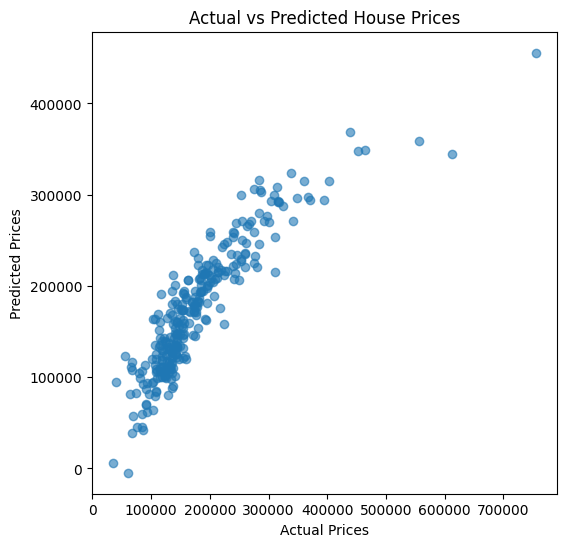

In [39]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [40]:
import joblib

# Save the model
joblib.dump(model, "house_price_model.pkl")
print("Model saved as house_price_model.pkl")


Model saved as house_price_model.pkl


In [41]:
# Load the model
loaded_model = joblib.load("house_price_model.pkl")

# Predict a new example (first row of X_test)
example = X_test.iloc[0:1]
print("Example features:\n", example)
print("Actual price:", y_test.iloc[0])
print("Predicted price:", loaded_model.predict(example)[0])


Example features:
      GrLivArea  OverallQual  TotalBsmtSF  FullBath  GarageCars
892       1068            6         1059         1           1
Actual price: 154500
Predicted price: 143056.35725216626


In [42]:
new_house = pd.DataFrame({
    "GrLivArea": [2000],
    "OverallQual": [7],
    "TotalBsmtSF": [800],
    "FullBath": [2],
    "GarageCars": [2]
})

predicted_price = loaded_model.predict(new_house)[0]
print("Predicted price for new house:", predicted_price)


Predicted price for new house: 219507.57939536302


In [43]:
import numpy as np
y_train_log = np.log(y_train)
model.fit(X_train, y_train_log)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False
